In [1]:
%matplotlib inline
import seaborn
import quandl
import pandas as pd
import seaborn as sns
import math
from tsmom_model import *
import numpy as np
from datetime import datetime
token="Us3wFmXGgAj_1cUtHAAR"

import pylab
pylab.rcParams['figure.figsize'] = (24, 18)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


# Correlation approach to clense data
Use pairwise correlation in order to decide which which markets are duplicates then use the one with the longer history. 

In [2]:
cleansed=cleansed_data()

tsmom_model.py:141: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  data=pd.read_csv('Price.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='last')
tsmom_model.py:143: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  qd=pd.read_csv('liquid_contracts.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='last')


ICE-BRENT CRUDE OIL    True
ICE-GAS OIL            True
Name: NYM-NY HARBOR ULSD, dtype: bool
CME-NIKKEI 225 INDEX COMB.    True
SGX DT-NIKKEI 225 ETS         True
Name: OSX-NIKKEI 225 INDEX, dtype: bool
NYM-LIGHT CRUDE OIL    True
NYM-NY HARBOR ULSD     True
ICE-GAS OIL            True
Name: ICE-BRENT CRUDE OIL, dtype: bool
ICE-BRENT CRUDE OIL    True
NYM-NY HARBOR ULSD     True
Name: ICE-GAS OIL, dtype: bool
SGX DT-NIKKEI 225 ETS    True
OSX-NIKKEI 225 INDEX     True
Name: CME-NIKKEI 225 INDEX COMB., dtype: bool
S&P MidCap 400            True
Dow Jones                 True
CME-MINI S&P 500 INDEX    True
Name: CME-S&P 500 INDEX COMP, dtype: bool
CME-NIKKEI 225 INDEX COMB.    True
OSX-NIKKEI 225 INDEX          True
Name: SGX DT-NIKKEI 225 ETS, dtype: bool
CME-S&P 500 INDEX COMP    True
Russell 2000              True
Name: S&P MidCap 400, dtype: bool

tsmom_model.py:110: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  corr=df.resample(rule='m',how='last').corr()
tsmom_model.py:130: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  mkt1 =df[x].resample(rule='m',how='last').count()


tsmom_model.py:131: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  mkt2 =df[y].resample(rule='m',how='last').count()


In [3]:
cleansed.count().count()

140

# Amihud methodology

Amihud (2002) developed the illiquidity measure expressed by:

$$ Amihud = \frac{|r_t|}{\text{volume}_t} $$

where $r_t$ is the return on day $t$ and $Volume_t$ is the dollar volume on day $t$. 

The benefit of taking the daily return is to weight the move by change of price and the volume.


In [4]:
amihud=calculate_amihud_liquidity(cleansed)[:'2016'] 

tsmom_model.py:29: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  data=pd.read_csv('Volume.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='mean')
tsmom_model.py:31: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  v=pd.read_csv('volume_data.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='sum')
tsmom_model.py:33: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(min_periods=100,window=250,center=False).mean()
  volume=pd.rolling_mean(v,250,min_periods=100).resample(rule='d',how='mean')[:'2016']
tsmom_model.py:33: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  volume=pd.rolling_mean(v,250,min_periods=100).resample(rule='d',how='mean')[:'2016']
tsmom_model.py:36: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future versio

MEXDER-10YR BOND
ZCE-RAPESEED MEAL
BMF-US DOLLAR
NORDPOOL-ENO QTR
EEX-MONTHLY PEAKLOAD
LIFFE-10Y E SWAPNOTE
LIFFE-2YR E SWAPNOTE
OSX-NIKKEI 225 INDEX
ENDEX-TTF GAS BASE LOAD
ENDEX-TTF GAS BASE LOAD QTR
ENDEX-TTF GAS BASE LOAD SEASON
Canadian Bankers Acceptance
Russian Ruble

tsmom_model.py:65: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  px=cleansed.resample(rule='d',how='last')
tsmom_model.py:73: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  x= (cleansed.pct_change().abs()/ total_vol).resample(rule='m',how='mean')


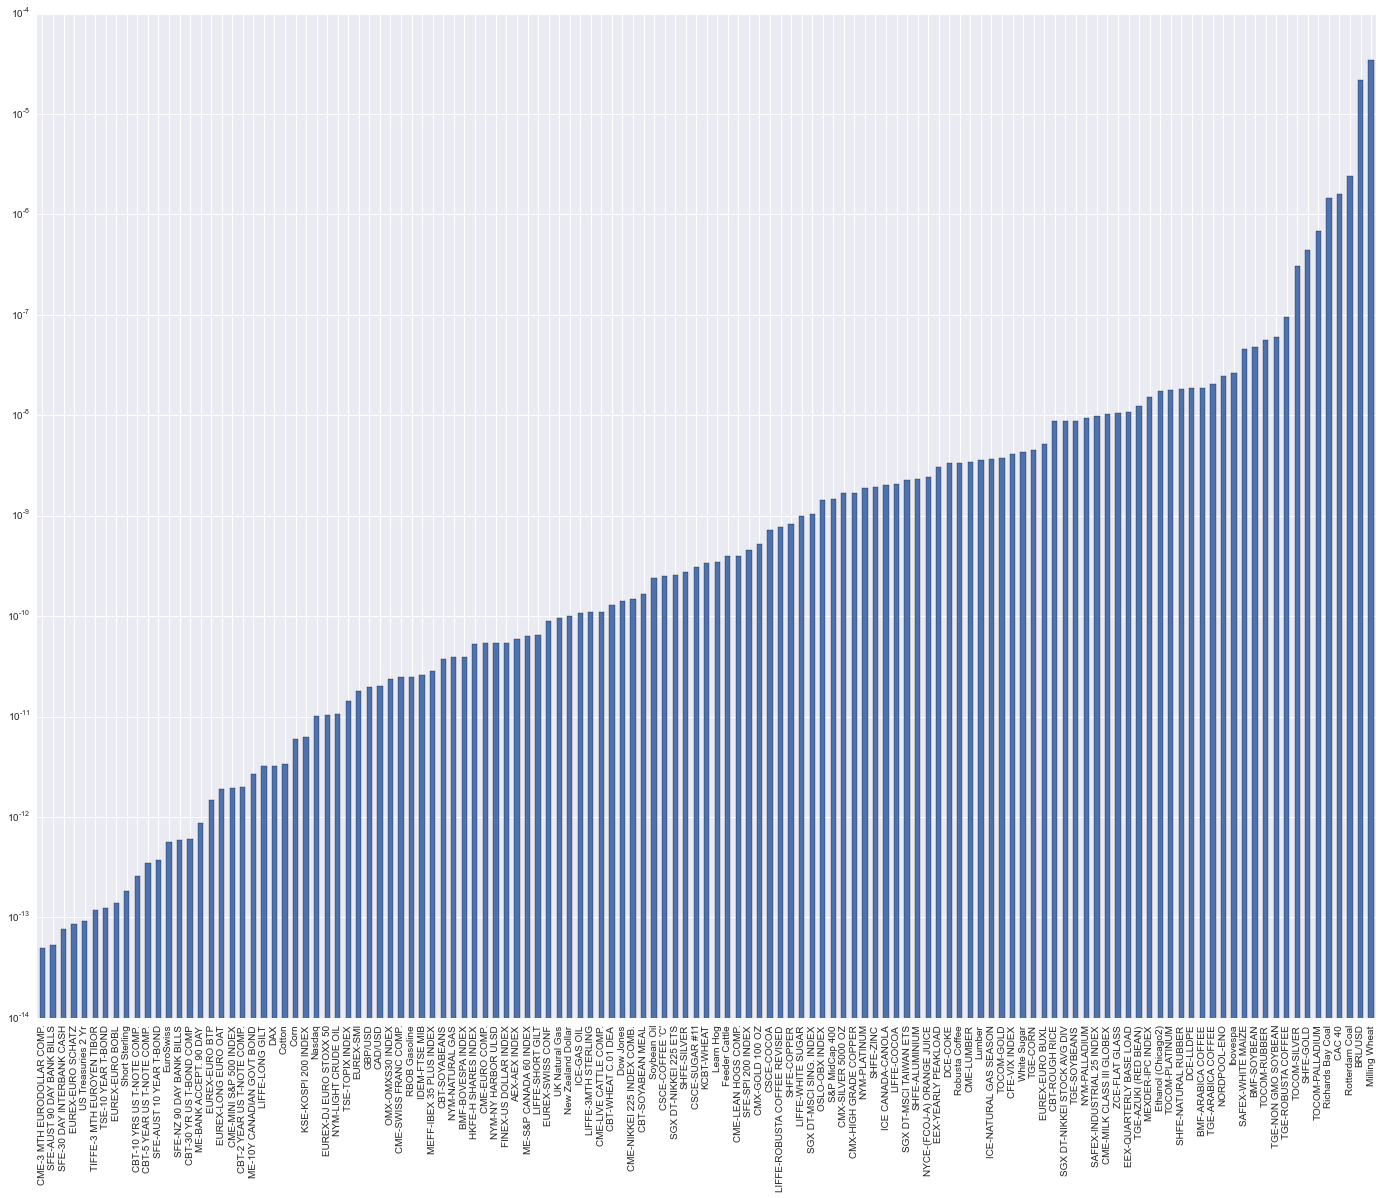

In [5]:
amihud.mean().dropna().sort_values().dropna().plot(kind='bar',logy=True)

In [6]:
mon= cleansed.resample(rule='m',how='last')
da=[]
for mkt in mon.columns:
    x = mon[mkt].dropna()[:'2016']
    d = (pd.Series(x.index[1:]) - pd.Series(x.index[:-1])).max().days
    if d > 31:
        da.append([mkt,d])
df=pd.DataFrame(da).set_index(0)

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':


In [7]:
mon= cleansed.resample(rule='m',how='last')
dd=pd.DataFrame()
for mkt in mon.columns:
    x = mon[mkt].dropna()[:'2016']
    d = (pd.Series(x.index[1:]) - pd.Series(x.index[:-1]))
    e=(d.values/86400000000000)
    f=e.tolist()
    oo=pd.Series(f,index=x[1:].index)
    if oo.max()>32:
        dd[mkt]=oo

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':


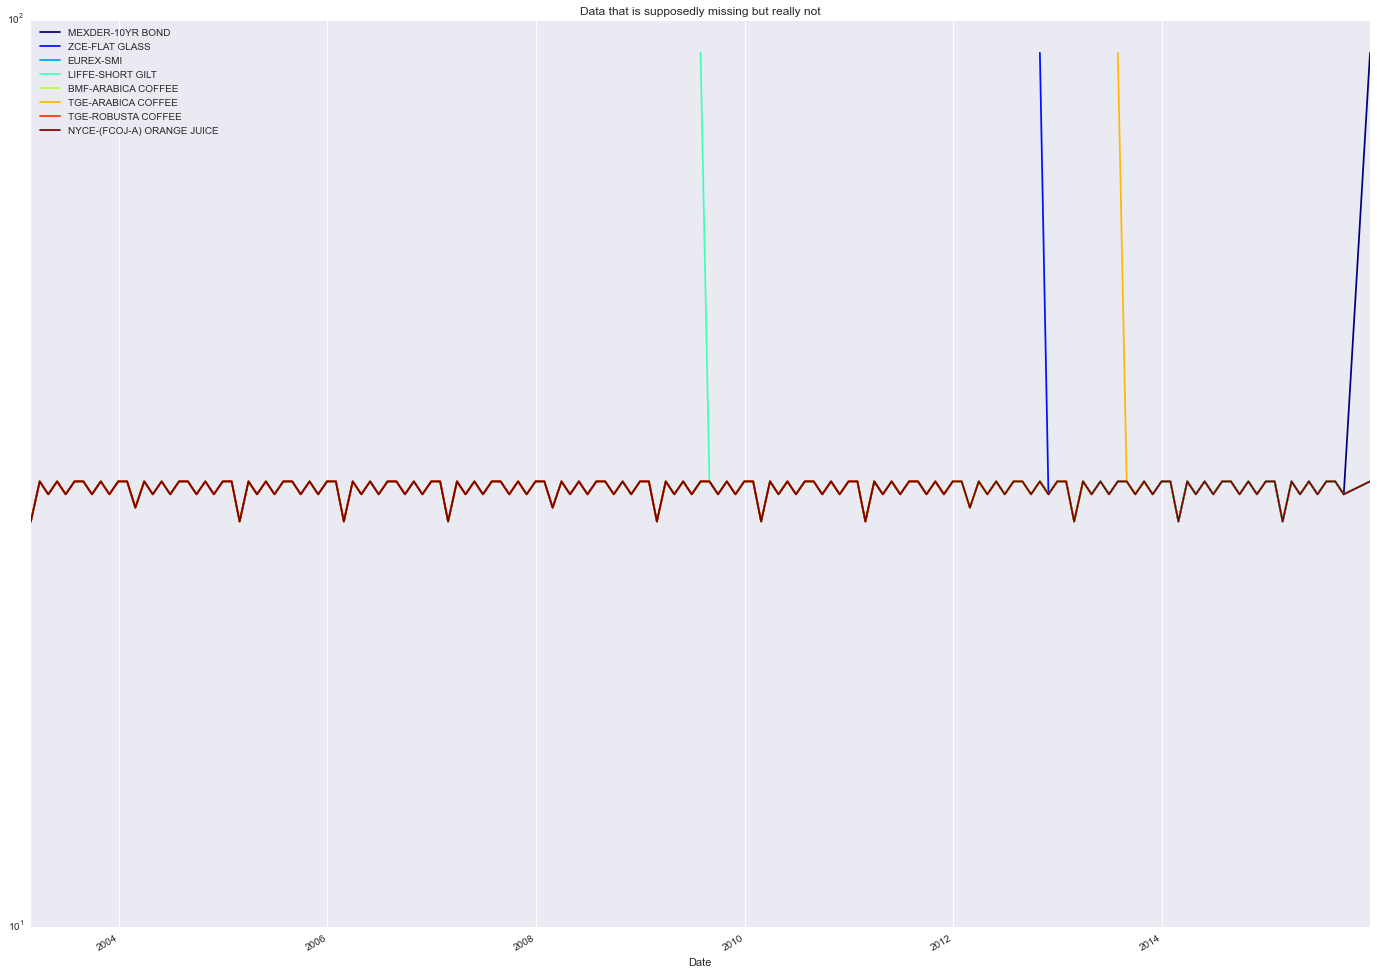

In [8]:
dd[:'2016'].plot(colormap='jet',logy=True,title='Data that is supposedly missing but really not')

#Todo


Find out how to define gap risk

Calculate skew
  - remove infinite Amihud rates



In [9]:
sk=cleansed.resample(rule='m',how='last').skew()

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':


OSX-NIKKEI 225 INDEX


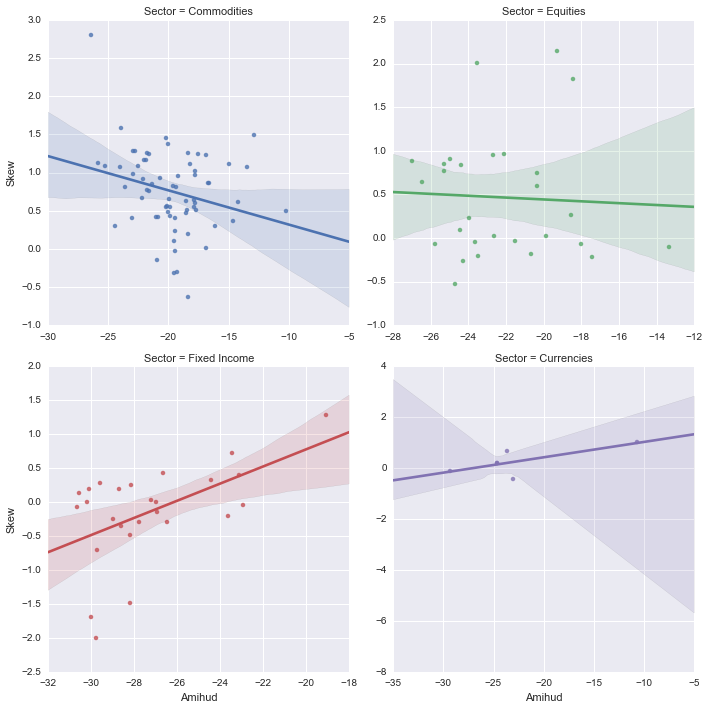

In [17]:
contract_size =load_maps()
sector_map=contract_size.to_dict()['Sector']
compare =pd.DataFrame()
compare['Skew']=sk
s=pd.Series()
for i in sk.index:
    try:
        s[i]=sector_map[i]
    except:
        print i
compare['Sector']=s
compare['Amihud']=np.log(amihud.mean())
compare=compare.dropna()
sns.lmplot(x='Amihud',fit_reg=True,y='Skew',hue='Sector',sharey=False,sharex=False, 
           col='Sector',col_wrap=2,data=compare)